In [29]:
import logging
logging.root.setLevel(logging.INFO)


In [30]:
import random

from xcs import XCSAlgorithm
from xcs.scenarios import Scenario

In [31]:
from utils.xcs_utils import *

In [32]:
exploration_cycles = 4000
exploitation_cycles = 1000
input_size = 8
logging.root.setLevel(logging.INFO)
scenario = MazeScenario(input_size)
scenario.maze.reset()
scenario.maze.render()


■ ■ ■ ■ ■ ■ ■ ■
■ □ □ ■ □ □ $ ■
■ ■ □ □ ■ □ A ■
■ ■ □ ■ □ □ ■ ■
■ □ □ □ □ □ □ ■
■ ■ □ ■ □ □ □ ■
■ □ □ □ □ ■ □ ■
■ ■ ■ ■ ■ ■ ■ ■


In [33]:
import numpy as np
algorithm = XCSAlgorithm()
algorithm.max_population_size = 200
algorithm.learning_rate = .1
algorithm.error_threshold = .01              # epsilon_0
algorithm.ga_threshold = 25
algorithm.crossover_probability = 0.5
algorithm.mutation_probability = 0.01
algorithm.initial_prediction = float(np.finfo(np.float32).tiny)        # p_I
algorithm.initial_error = float(np.finfo(np.float32).tiny)            # epsilon_I
algorithm.initial_fitness = float(np.finfo(np.float32).tiny)           # F_I
algorithm.wildcard_probability = 0

In [34]:
other_metrics = other_avg_experiment(
                                     maze=scenario,
                                     algorithm=algorithm,
                                     number_of_tests=5,
                                     explore_trials=exploration_cycles,
                                     exploit_trials=exploitation_cycles
                                    )


Executing 0 experiment
Executing 1 experiment
Executing 2 experiment
Executing 3 experiment
Executing 4 experiment


In [35]:
display(other_metrics)

,steps_in_trial,population,numerosity
trial,,,
0,30.8,28.8,29.6
100,44.0,141.6,200.0
200,41.2,143.2,200.0
300,35.6,137.4,200.0
400,39.2,139.6,200.0
500,45.0,136.2,200.0
600,32.8,137.0,200.0
700,36.6,137.6,200.0
800,38.4,142.6,200.0


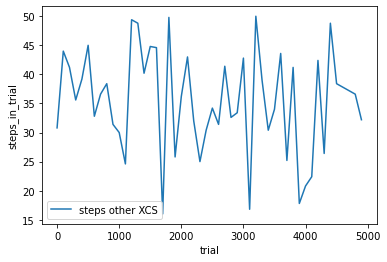

In [36]:
import pandas as pd

ax = other_metrics["steps_in_trial"].plot()
ax.set_xlabel("trial")
ax.set_ylabel("steps_in_trial")
ax.legend(["steps other XCS"])

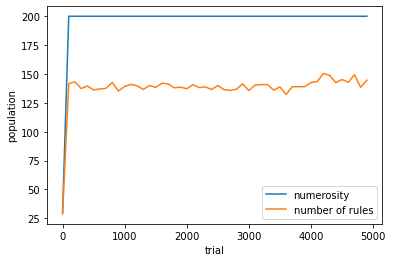

In [37]:
ax = other_metrics[['numerosity', 'population']].plot()
ax.set_xlabel("trial")
ax.set_ylabel("population")
ax.legend(["numerosity", "number of rules"])

In [38]:
from lcs.agents.xcs import Configuration
from utils.xcs_utils import *
                    

cfg = Configuration(number_of_actions=8,
                    max_population=200,
                    covering_wildcard_chance = 1,
                    metrics_trial_frequency=100,
                    user_metrics_collector_fcn=xcs_metrics)

In [39]:
from lcs.agents.xcs import XCS


agent = XCS(cfg)
my_metrics = avg_experiment(scenario,
                    cfg,
                    number_of_tests=5,
                    explore_trials=exploration_cycles,
                    exploit_metrics=exploitation_cycles)


INFO:lcs.agents.Agent:{'trial': 0, 'steps_in_trial': 50, 'reward': [5.1200643157495e-41, 1.0254604841732145e-40, 2.9915190908737574e-41, 1.9710514767964755e-40, 9.228969786532952e-41, 5.725119250207043e-41, 1.938962294654073e-40, 4.910922728877399e-41], 'perf_time': 0.01915710000002946, 'population': 104, 'numerosity': 110}


Executing 0 experiment


INFO:lcs.agents.Agent:{'trial': 400, 'steps_in_trial': 50, 'reward': [25.907780274684487, 19.29998613185881, 19.86598910983664, 18.98040521730779, 20.628074920025604, 14.27556207648116, 20.416264345156392, 16.517131822043538], 'perf_time': 0.037464900000031776, 'population': 178, 'numerosity': 200}
INFO:lcs.agents.Agent:{'trial': 800, 'steps_in_trial': 14, 'reward': [46.515721273231144, 50.576360486849744, 220.58487249407153, 49.216564473423304, 40.51124497570612, 39.0326580826752, 44.042351873115365, 41.518059002934585], 'perf_time': 0.016042799999922863, 'population': 180, 'numerosity': 200}
INFO:lcs.agents.Agent:{'trial': 1200, 'steps_in_trial': 50, 'reward': [26.907094597807593, 31.178039235437755, 34.44224107010148, 33.15180403842226, 33.67967597043441, 32.3088691251137, 28.295786484686563, 25.186343454965407], 'perf_time': 0.04064949999997225, 'population': 177, 'numerosity': 201}
INFO:lcs.agents.Agent:{'trial': 1600, 'steps_in_trial': 50, 'reward': [13.295173890748659, 12.782474

Executing 1 experiment


INFO:lcs.agents.Agent:{'trial': 400, 'steps_in_trial': 50, 'reward': [21.9106043669243, 41.41777603026866, 30.284193486099266, 30.08283235581386, 24.54832970446534, 21.882843765736503, 20.964182115773724, 19.63410962859816], 'perf_time': 0.033035700000027646, 'population': 177, 'numerosity': 200}
INFO:lcs.agents.Agent:{'trial': 800, 'steps_in_trial': 50, 'reward': [19.731198562708425, 24.191694200731703, 23.767744936717623, 20.30652142564632, 23.979686527601462, 28.127853201797862, 23.923956322526788, 24.276678324920034], 'perf_time': 0.03290590000005977, 'population': 163, 'numerosity': 200}
INFO:lcs.agents.Agent:{'trial': 1200, 'steps_in_trial': 50, 'reward': [25.32093843436928, 22.18137546300416, 27.88822359797008, 24.42028739737566, 20.207452469266904, 15.553013920251667, 25.367462331285907, 22.639052866958284], 'perf_time': 0.03492280000000392, 'population': 177, 'numerosity': 200}
INFO:lcs.agents.Agent:{'trial': 1600, 'steps_in_trial': 50, 'reward': [24.7699283582336, 17.31083055

Executing 2 experiment


INFO:lcs.agents.Agent:{'trial': 400, 'steps_in_trial': 14, 'reward': [40.5569964203514, 33.41476766062825, 145.00188148056952, 44.73191710555119, 40.4259883466297, 58.467848030544445, 31.76642192218587, 27.755554377716035], 'perf_time': 0.01678659999993215, 'population': 170, 'numerosity': 200}
INFO:lcs.agents.Agent:{'trial': 800, 'steps_in_trial': 50, 'reward': [43.20341185004063, 51.36957443106685, 61.22642590597113, 52.443781337657015, 38.24778479021772, 41.68427210783105, 40.61038320130544, 43.575123113009326], 'perf_time': 0.025990200000023833, 'population': 175, 'numerosity': 200}
INFO:lcs.agents.Agent:{'trial': 1200, 'steps_in_trial': 8, 'reward': [239.37357769491675, 52.57176330524763, 39.996882710003845, 22.089277141356558, 25.429233524950583, 27.52786531396398, 28.08069914777806, 28.83180892352606], 'perf_time': 0.004012800000054995, 'population': 179, 'numerosity': 200}
INFO:lcs.agents.Agent:{'trial': 1600, 'steps_in_trial': 27, 'reward': [61.90153696504686, 156.850519946354

Executing 3 experiment


INFO:lcs.agents.Agent:{'trial': 400, 'steps_in_trial': 50, 'reward': [68.43960012857359, 41.855581338481336, 24.065683961514555, 37.62692828228827, 23.79635507867328, 32.42913056579862, 28.715748440343436, 28.355050243595976], 'perf_time': 0.038631599999916943, 'population': 174, 'numerosity': 201}
INFO:lcs.agents.Agent:{'trial': 800, 'steps_in_trial': 50, 'reward': [24.56080514530715, 78.90320133123274, 19.846464572207967, 14.601878537878335, 18.28351078873396, 23.18719631823254, 18.89490582162067, 19.650183848573434], 'perf_time': 0.04262719999996989, 'population': 172, 'numerosity': 200}
INFO:lcs.agents.Agent:{'trial': 1200, 'steps_in_trial': 38, 'reward': [22.5647031793508, 22.301485378300917, 121.96275460623184, 21.413318199557725, 24.26013349727496, 20.253664507602895, 23.436518942764067, 23.893895221473503], 'perf_time': 0.033027599999968515, 'population': 179, 'numerosity': 201}
INFO:lcs.agents.Agent:{'trial': 1600, 'steps_in_trial': 50, 'reward': [28.610718122978863, 31.612416

Executing 4 experiment


INFO:lcs.agents.Agent:{'trial': 400, 'steps_in_trial': 50, 'reward': [49.50521946118667, 31.447427970882977, 88.74784658548482, 31.464854598887342, 30.689414008058222, 31.229611319443, 38.50802507482984, 26.12355387577618], 'perf_time': 0.03933359999996355, 'population': 175, 'numerosity': 200}
INFO:lcs.agents.Agent:{'trial': 800, 'steps_in_trial': 50, 'reward': [36.60059751310689, 24.332108658328202, 52.50500377628407, 43.91767546951144, 40.94802281544857, 38.395470926123366, 63.13421778828052, 33.56922894754096], 'perf_time': 0.04006000000003951, 'population': 177, 'numerosity': 200}
INFO:lcs.agents.Agent:{'trial': 1200, 'steps_in_trial': 50, 'reward': [58.89414750339108, 23.895952951478677, 40.07905261737639, 21.239705493340853, 24.00671242172224, 29.0813208937632, 30.794914934562296, 19.654526062220665], 'perf_time': 0.03217070000005151, 'population': 176, 'numerosity': 201}
INFO:lcs.agents.Agent:{'trial': 1600, 'steps_in_trial': 50, 'reward': [23.59528237026459, 25.54224799651237,

In [40]:
display(my_metrics)

,steps_in_trial,perf_time,population,numerosity
trial,,,,
0,50.0,0.017250,84.6,88.6
100,50.0,0.034758,174.4,200.8
200,33.0,0.024187,173.6,200.0
300,36.6,0.029357,177.0,200.2
400,42.8,0.033050,174.8,200.2
500,31.0,0.025600,177.8,200.2
600,40.8,0.035055,174.6,200.2
700,39.2,0.029996,173.2,200.0
800,42.8,0.031525,173.4,200.0


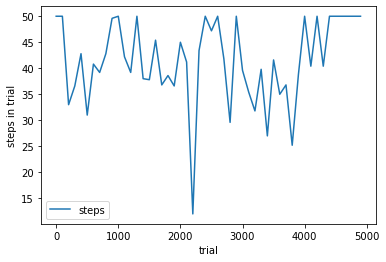

In [41]:
import pandas as pd

ax = my_metrics['steps_in_trial'].plot()
ax.set_xlabel("trial")
ax.set_ylabel("steps in trial")
ax.legend(["steps"])


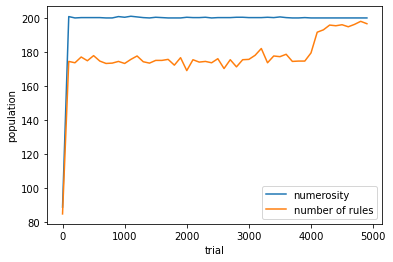

In [42]:
ax = my_metrics[['numerosity', 'population']].plot()
ax.set_xlabel("trial")
ax.set_ylabel("population")
ax.legend(["numerosity", "number of rules"])

#### Conclusions
None so far.